In [13]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [14]:
def generate_ws_with_embedding(n=50, k=4, p=0.1, space_size=100):
    """
    ÁîüÊàê WS Â∞è‰∏ñÁïåÁΩëÁªúÔºàWatts‚ÄìStrogatz modelÔºâÔºåÂπ∂ËøõË°å‰∫åÁª¥ÂµåÂÖ•„ÄÇ
    ÂèÇÊï∞:
        n: ËäÇÁÇπÊï∞Èáè
        k: ÊØè‰∏™ËäÇÁÇπÂàùÂßãËøûÊé•ÁöÑÊúÄËøëÈÇª‰∏™Êï∞ÔºàÂøÖÈ°ªÊòØÂÅ∂Êï∞Ôºâ
        p: ÈáçËøûÊ¶ÇÁéá
        space_size: ËäÇÁÇπÂùêÊ†áËåÉÂõ¥Ôºà‰∫åÁª¥Á©∫Èó¥Â§ßÂ∞èÔºâ
    ËøîÂõû:
        G: networkx ÂõæÂØπË±°
        positions: ËäÇÁÇπ‰ΩçÁΩÆÂ≠óÂÖ∏ {ËäÇÁÇπ: (x, y)}
    """
    # 1. ÁîüÊàê WS Â∞è‰∏ñÁïåÁΩëÁªú
    G = nx.watts_strogatz_graph(n=n, k=k, p=p)

    # 2. ÈöèÊú∫‰∫åÁª¥ÂµåÂÖ•ÂùêÊ†á
    positions = {i: np.random.rand(2) * space_size for i in G.nodes()}
    nx.set_node_attributes(G, positions, 'pos')

    # 3. ‰∏∫ÊØèÊù°ËæπÊ∑ªÂä†Ê¨ßÂá†ÈáåÂæóË∑ùÁ¶ª‰Ωú‰∏∫ÊùÉÈáç
    for u, v in G.edges():
        dist = np.linalg.norm(positions[u] - positions[v])
        G[u][v]['weight'] = dist

    return G, positions

In [15]:
def plot_ws_network(G, positions, n, k, p):
    """
    ÁªòÂà∂ WS ÁΩëÁªúÂõæÔºåÂπ∂Ê†áÊ≥®ÂèÇÊï∞‰ø°ÊÅØ
    """
    plt.figure(figsize=(8, 6))
    nx.draw(
        G,
        pos=positions,
        with_labels=True,
        node_color='skyblue',
        node_size=300,
        edge_color='gray',
        width=1.5
    )
    plt.title(f"WS Small-World Network (n={n}, k={k}, p={p})", fontsize=14)
    plt.axis('equal')
    plt.show()

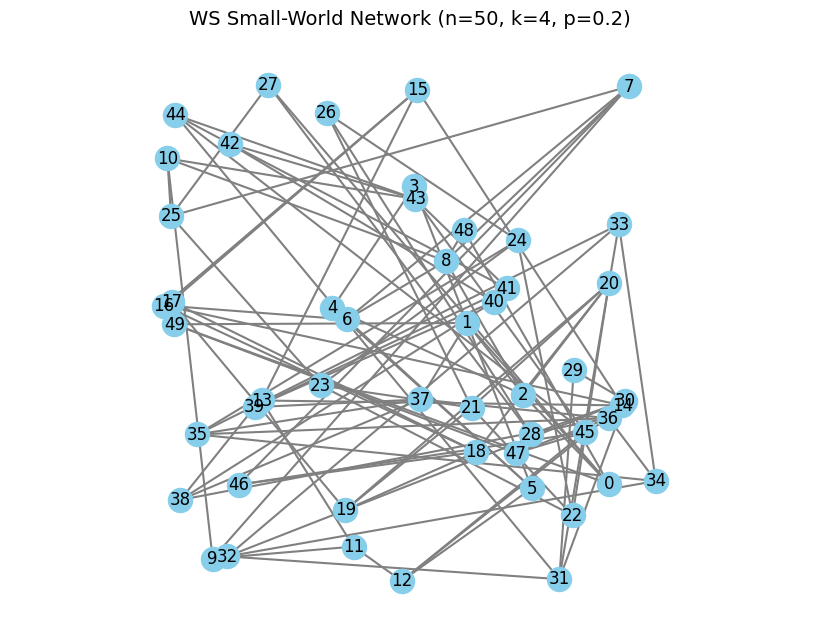

In [16]:

# üîß ‰ΩøÁî®Á§∫‰æã
n = 50    # ËäÇÁÇπÊï∞
k = 4     # ÁéØÁä∂ÊúÄËøëÈÇªËøûÊé•Êï∞ÔºàÂøÖÈ°ª‰∏∫ÂÅ∂Êï∞Ôºâ
p = 0.2   # ÈáçËøûÊ¶ÇÁéá

G_ws, pos_ws = generate_ws_with_embedding(n=n, k=k, p=p)
plot_ws_network(G_ws, pos_ws, n=n, k=k, p=p)

In [17]:
def abundance_index(G):
    return sum(dict(G.degree()).values())

# ÁîüÊàê WS ÁΩëÁªú
n = 50   # ËäÇÁÇπÊï∞
k = 4    # ÊØè‰∏™ËäÇÁÇπÂàùÂßãËøûÊé•ÊúÄËøëÈÇªÔºàÂøÖÈ°ª‰∏∫ÂÅ∂Êï∞Ôºâ
p = 0.1  # ÈáçËøûÊ¶ÇÁéá

G_ws = nx.watts_strogatz_graph(n=n, k=k, p=p)

# ËÆ°ÁÆó‰∏∞Â∫¶ A
A = abundance_index(G_ws)
print(f"WS Network Abundance A = {A}")

WS Network Abundance A = 200


In [20]:
def node_weight_sums(G):
    """
    ËÆ°ÁÆóÊØè‰∏™ËäÇÁÇπÁõ∏ÈÇªËæπÁöÑÊùÉÈáç‰πãÂíå„ÄÇ
    ËøîÂõûÊ†ºÂºèÔºö{ËäÇÁÇπÁºñÂè∑: ÊùÉÈáçÂíå}
    """
    weight_sum = {}
    for node in G.nodes():
        total = 0
        for neighbor in G.neighbors(node):
            total += G[node][neighbor]['weight']
        weight_sum[node] = total
    return weight_sum




In [21]:
# ÊâìÂç∞ÂâçÂá†‰∏™ËäÇÁÇπÁöÑÂä†ÊùÉÂ∫¶

# üß™ ‰ΩøÁî®Á§∫‰æãÔºàÂü∫‰∫é‰Ω†ÁîüÊàêÁöÑ G_wsÔºâ
weight_sums_ws = node_weight_sums(G_ws)
for node, total_weight in list(weight_sums_ws.items())[:10]:
    print(f"Node {node}: total edge weight = {total_weight:.2f}")

KeyError: 'weight'